### Data Cleaning and Visualization on Frontex Data 

This data set comes from Frontex which is Europe's border patrol and coast guard agency.  

http://frontex.europa.eu/intelligence/analytics/

In [68]:
suppressPackageStartupMessages({library(ggplot2) 
library(plotly)
library(readr) 
library(tidyverse)
library(dplyr)
library(tidyr)                                
library(gridExtra)
library(grid)
library(ggthemes)
library(RColorBrewer)
library(reshape)
library(stringr)    
library(lubridate)
})

# read in the data set and view it 
frontex <- read_csv("../experimental/data/frontex_border_crossings.csv")

# we need to fix the country names we'll use regular expressions to remove some of the odd characters in the names
frontex$NationalityLong <- str_replace_all(frontex$NationalityLong, "[^[:alnum:]]", "")

head(frontex)
unique(frontex$NationalityLong)

Parsed with column specification:
cols(
  .default = col_integer(),
  Route = col_character(),
  BorderLocation = col_character(),
  NationalityLong = col_character()
)
See spec(...) for full column specifications.


Route,BorderLocation,NationalityLong,Jan-09,Feb-09,Mar-09,Apr-09,May-09,Jun-09,Jul-09,⋯,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17
Black Sea,Sea,Afghanistan,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
Black Sea,Sea,Algeria,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,1,0
Black Sea,Sea,Belarus,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
Black Sea,Sea,Iran,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,3,32,0
Black Sea,Sea,Iraq,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,134,301,0
Black Sea,Sea,Morocco,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,1,0


[1] "Afghanistan"                         
  [2] "Algeria"                             
  [3] "Belarus"                             
  [4] "Iran"                                
  [5] "Iraq"                                
  [6] "Morocco"                             
  [7] "Notspecified"                        
  [8] "Pakistan"                            
  [9] "Somalia"                             
 [10] "Syria"                               
 [11] "Turkey"                              
 [12] "Albania"                             
 [13] "Angola"                              
 [14] "Azerbaijan"                          
 [15] "Bangladesh"                          
 [16] "Belize"                              
 [17] "Benin"                               
 [18] "Bermuda"                             
 [19] "BurkinaFaso"                         
 [20] "Burundi"                             
 [21] "Cameroon"                            
 [22] "CapeVerde"                           
 [23] "CentralAfricanRepublic"              
 [24] "Chad"                                
 [25] "China"                               
 [26] "Comoros"                             
 [27] "Congo"                               
 [28] "CongoDR"                             
 [29] "CtedIvoire"                          
 [30] "Djibouti"                            
 [31] "Dominica"                            
 [32] "Egypt"                               
 [33] "EquatorialGuinea"                    
 [34] "Eritrea"                             
 [35] "Ethiopia"                            
 [36] "Gabon"                               
 [37] "Gambia"                              
 [38] "Georgia"                             
 [39] "Ghana"                               
 [40] "Guinea"                              
 [41] "GuineaBissau"                        
 [42] "Haiti"                               
 [43] "India"                               
 [44] "Israel"                              
 [45] "Jamaica"                             
 [46] "Jordan"                              
 [47] "Kenya"                               
 [48] "Kosovo"                              
 [49] "Kuwait"                              
 [50] "Kyrgyzstan"                          
 [51] "Lebanon"                             
 [52] "Lesotho"                             
 [53] "Liberia"                             
 [54] "Libya"                               
 [55] "Madagascar"                          
 [56] "Malawi"                              
 [57] "Malaysia"                            
 [58] "Mali"                                
 [59] "Mauritania"                          
 [60] "Mauritius"                           
 [61] "Myanmar"                             
 [62] "Namibia"                             
 [63] "Nepal"                               
 [64] "Niger"                               
 [65] "Nigeria"                             
 [66] "Oman"                                
 [67] "Palestine"                           
 [68] "Panama"                              
 [69] "Philippines"                         
 [70] "Russia"                              
 [71] "Rwanda"                              
 [72] "SaudiArabia"                         
 [73] "Senegal"                             
 [74] "SierraLeone"                         
 [75] "SouthAfrica"                         
 [76] "SouthSudan"                          
 [77] "SriLanka"                            
 [78] "Sudan"                               
 [79] "TanzaniaUnitedRepublicof"            
 [80] "Togo"                                
 [81] "Tunisia"                             
 [82] "Uganda"                              
 [83] "Ukraine"                             
 [84] "UnspecifiedsubSaharannationals"      
 [85] "Uzbekistan"                          
 [86] "Vietnam"                             
 [87] "Yemen"                               
 [88] "Zambia"                              
 [89] "Zimbabwe"                          

In [69]:
Route <- frontex

# change the route variable to a factor 
Route$Route <- as.factor(Route$Route)

# drop some columns 
Route$BorderLocation <- NULL
Route$NationalityLong <- NULL 

# look at the unique route values
unique(Route$Route)

[1] Black Sea                             Central Mediterranean                
 [3] Circular Route from Albania to Greece Eastern Land Borders                 
 [5] Eastern Mediterranean                 Not specified                        
 [7] Other                                 Western African                      
 [9] Western Balkans                       Western Mediterranean                
10 Levels: Black Sea ... Western Mediterranean

In [70]:
# group the data by route and sum by date column
rte_sums <- Route %>% 
  group_by(Route) %>% 
  summarise_all(funs(sum))

# view your new data frame with route totals by date
head(rte_sums)

# now transform the data so dates are in one column 2 and values/counts are in column 3
long <- rte_sums %>% gather(Date, Count, 2:107)

# view the new data to make sure it is in long form 
head(long)

Route,Jan-09,Feb-09,Mar-09,Apr-09,May-09,Jun-09,Jul-09,Aug-09,Sep-09,⋯,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17
Black Sea,0,1,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,137,335,0
Central Mediterranean,1491,1221,2519,1981,610,107,504,562,583,,4470,8882,10853,12870,22997,23461,11460,3914,6266,5923
Circular Route from Albania to Greece,1521,1884,2368,4207,5512,3701,3590,3245,5535,,304,563,672,637,547,473,398,583,677,842
Eastern Land Borders,93,82,133,112,115,150,107,135,134,,33,46,64,39,89,51,67,142,57,93
Eastern Mediterranean,2730,2228,2870,3299,3751,3880,3920,4272,3979,,1826,1601,2631,1708,2687,3011,3411,4782,7136,5381
Not specified,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0


Route,Date,Count
Black Sea,Jan-09,0
Central Mediterranean,Jan-09,1491
Circular Route from Albania to Greece,Jan-09,1521
Eastern Land Borders,Jan-09,93
Eastern Mediterranean,Jan-09,2730
Not specified,Jan-09,0


In [71]:
# now we need to clean up the date column a bit 

# we'll use this custom function which replaces characters w/numbers, adds a day, 
# and converts the date into a datetime object. 

cleanup <- function(df) {
    df <- gsub("Jan","1",df)
    df <- gsub("Feb","2",df)
    df <- gsub("Mar","3",df)
    df <- gsub("Apr","4",df)
    df <- gsub("May","5",df)
    df <- gsub("Jun","6",df)
    df <- gsub("Jul","7",df)
    df <- gsub("Aug","8",df)
    df <- gsub("Sep","9",df)
    df <- gsub("Oct","10",df)
    df <- gsub("Nov","11",df)
    df <- gsub("Dec","12",df)
    df <- paste0("01-", df)
    df <- dmy(df)
    return(df)
    }

# run function on Date Column 
long$Date <- cleanup(long$Date)

# view data structure to check new data types
# The Date is no longer a character, it is transformed into a datetime object 
str(long)

Classes 'tbl_df', 'tbl' and 'data.frame':	1060 obs. of  3 variables:
 $ Route: Factor w/ 10 levels "Black Sea","Central Mediterranean",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Date : Date, format: "2009-01-01" "2009-01-01" ...
 $ Count: int  0 1491 1521 93 2730 0 0 361 189 508 ...


Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
"

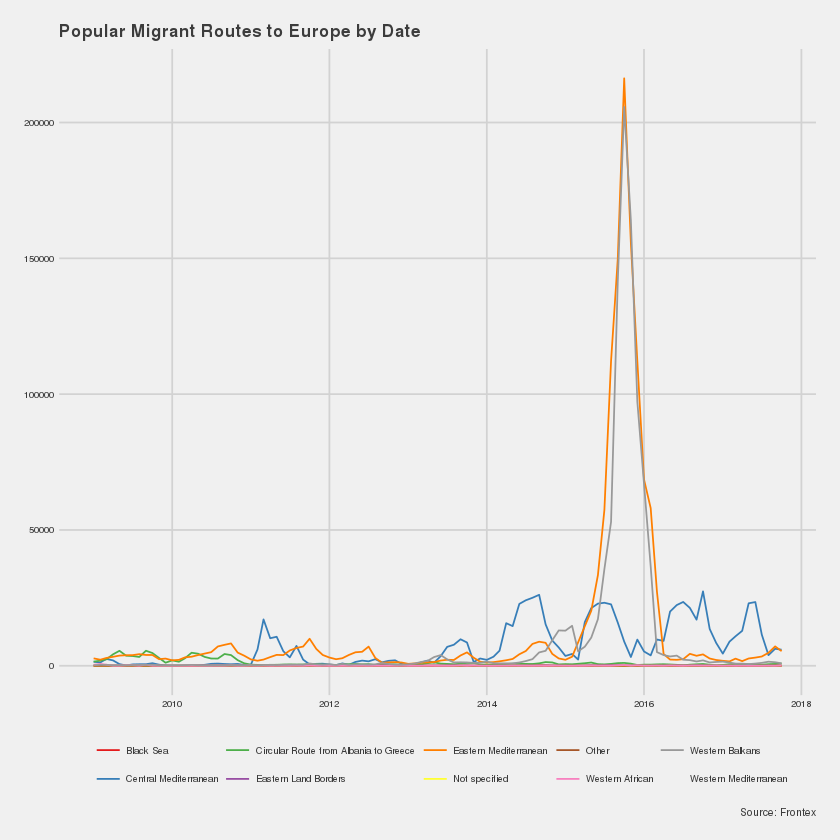

In [72]:
# plot the migrant counts by route to europe
p1 <- ggplot(long, aes(x=Date, y=Count, colour = Route)) + 
  geom_line() +
  ylab("Number of Migrants") +
  theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Dark2")+
  ggtitle("Popular Migrant Routes to Europe by Date") +
  labs(caption = "Source: Frontex") 

p1

#### Takeaway 

* The Eastern Mediterranean and Western Balkan routes were the prefered routes to Europe during the 2015 wave of migration 
* The Central Med route appears to fluctuae by date.  Perhaps there's some seasonality in the data.  Need to explore more, but I'm wondering if migrants prefer to use this route during warmer seasons such as summer.  

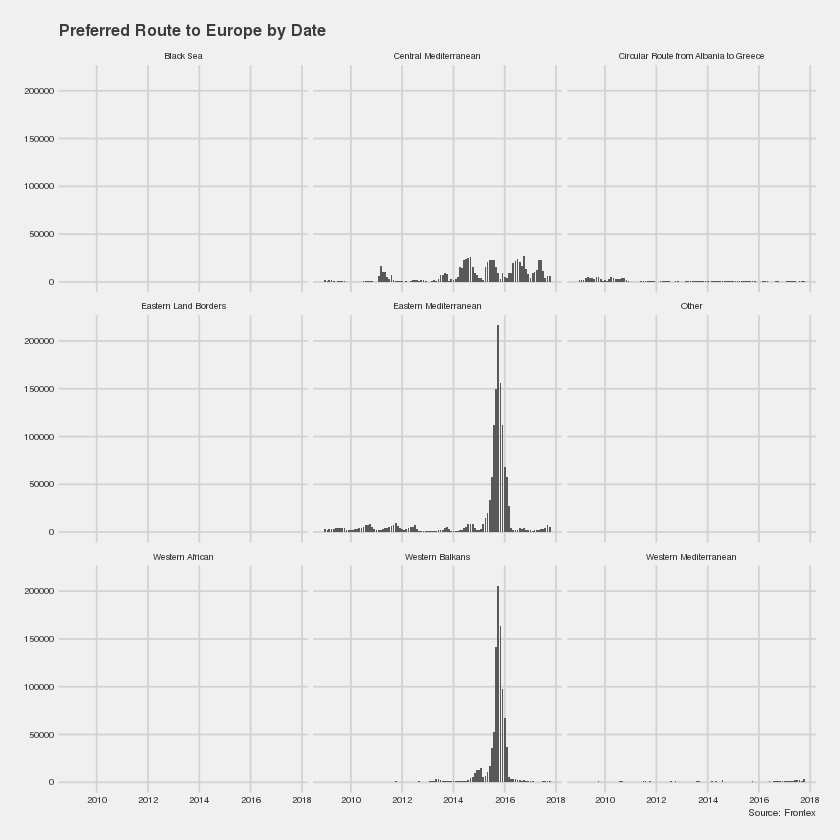

In [73]:
# We'll visualize the same data slightly differently.  
df1 <- long[long$Count >= 1,]

ggplot(data=df1, aes(x=Date, y=Count)) +
  geom_bar(stat="identity")+
  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Set3")+
  theme_fivethirtyeight(base_size = 6.5, base_family = "sans") + 
  theme(legend.position='bottom', legend.text=element_text(size=6)) + 
  ggtitle("Preferred Route to Europe by Date") +
  labs(caption = "Source: Frontex") +
  facet_wrap(~ Route)

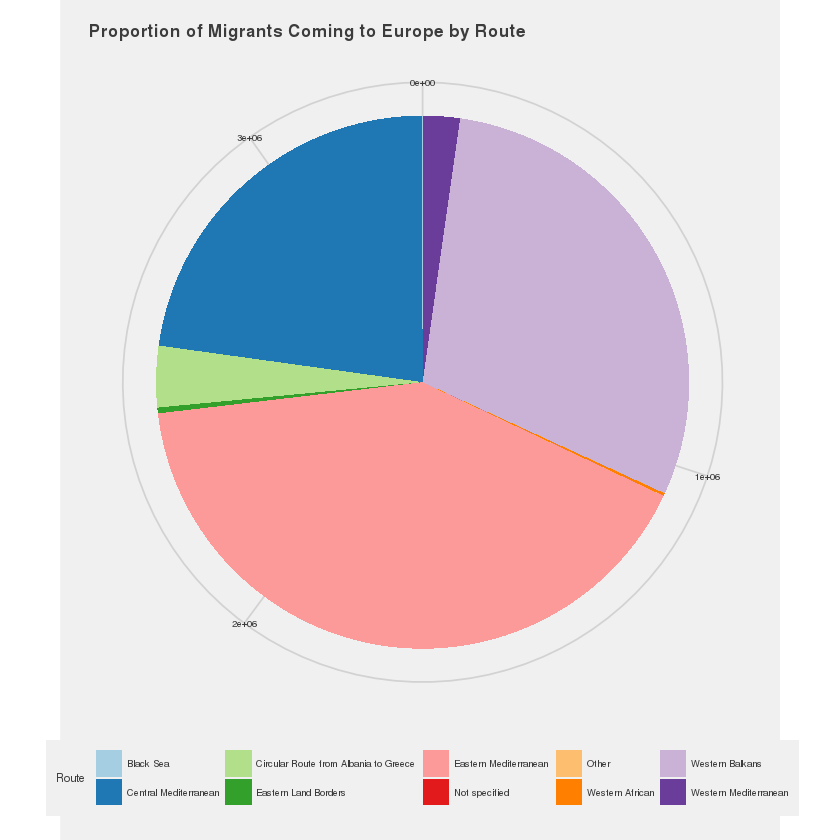

In [74]:
long$Date <- NULL 

# group the data by route and sum by date column
rte_shares <- long %>% 
  group_by(Route) %>% 
  summarise_all(funs(sum))


# plot missing persons in the med region 
plot <- ggplot(rte_shares, aes(x="", y=Count, fill=Route)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y", start=0) + 
    theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
    scale_fill_brewer(palette="Paired")+
    ggtitle('Proportion of Migrants Coming to Europe by Route')
plot

#### Takeaway 

* Just another way to visualize the routes most used by migrants coming to Europe.  Here we see the Eastern Med, Central Med, and Western Balkan route were the prefered routes to Europe by migrants from 2009-2018.  

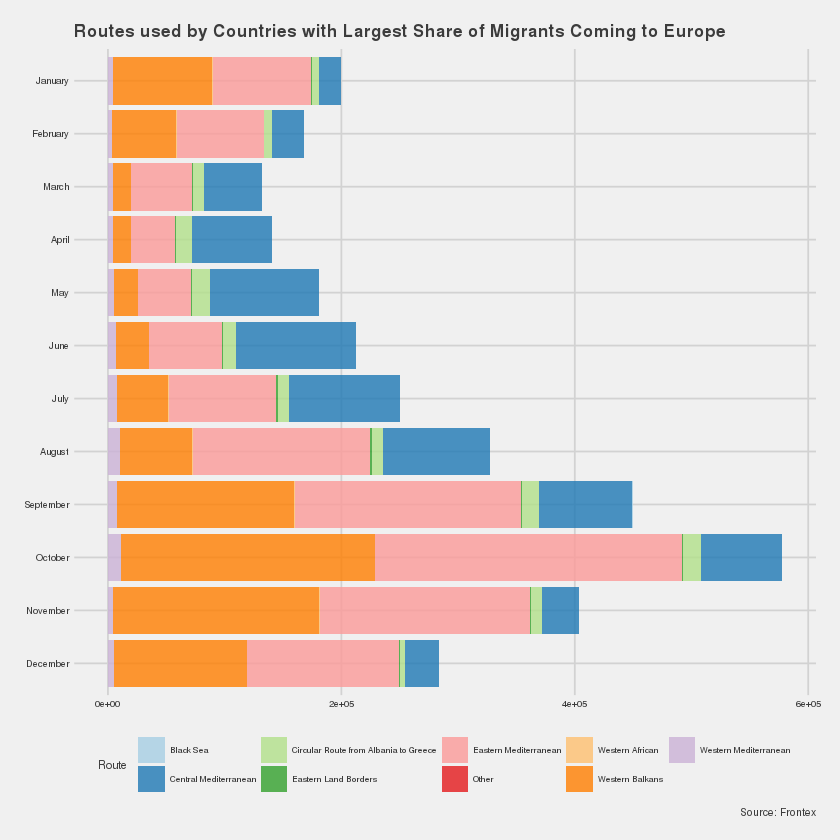

In [75]:
# let's take a closer look at the seasonality to see if we see anything of interest

flong <- frontex %>% 
        gather(Date, Count,4:109) 

# use our function again 
flong$Date <- cleanup(flong$Date)

# add month 
flong$Month <- months(flong$Date)

flong$Route <- as.factor(flong$Route)

flong$NationalityLong <- NULL 
flong$BorderLocation <- NULL 


# group the data by Nat and sum by date column
months <- flong %>% 
  group_by(Route, Month) %>% 
  summarise(Count = sum(Count))

months <- months[months$Count >= 1,]

p6 <- ggplot(data=months, aes(x=Month, y=Count, fill=Route)) +
  geom_bar(alpha = 8/10, stat="identity")+
  scale_fill_brewer(palette="Paired")+
  theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
  theme(legend.position='bottom', legend.text=element_text(size=5)) + 
  coord_flip() +
  ggtitle("Routes used by Countries with Largest Share of Migrants Coming to Europe") +
  labs(caption = "Source: Frontex") 

p6 + scale_x_discrete(limits = c("December","November", "October", "September", "August", "July", "June", "May", "April", "March", "February", "January"))


#### Takeaway 

* We notice some change in seasonality from winter and summer months for the central med route.  
* Overall - Fall seasons (Sep, Oct, Nov) were more popular dates for migrants coming to Europe.  They are more popular than our previous hypothosis that summer months (June, July, Aug) would be more popular requiring us to update our assumptions.  

In [76]:
flong <- frontex %>% 
        gather(Date, Count,4:109) 


head(flong)

Route,BorderLocation,NationalityLong,Date,Count
Black Sea,Sea,Afghanistan,Jan-09,0
Black Sea,Sea,Algeria,Jan-09,0
Black Sea,Sea,Belarus,Jan-09,0
Black Sea,Sea,Iran,Jan-09,0
Black Sea,Sea,Iraq,Jan-09,0
Black Sea,Sea,Morocco,Jan-09,0


In [77]:
flong_nat <- flong 

flong_nat$NationalityLong <- as.factor(flong_nat$NationalityLong)
flong_nat$BorderLocation <- as.factor(flong_nat$BorderLocation)


flong_nat$Route <- NULL 
flong_nat$Date <- NULL 


head(flong_nat)


# group the data by Nat and sum by date column
flong_nat_sum <- flong_nat %>% 
  group_by(NationalityLong, BorderLocation) %>% 
  summarise(Count = sum(Count))

head(flong_nat_sum)

BorderLocation,NationalityLong,Count
Sea,Afghanistan,0
Sea,Algeria,0
Sea,Belarus,0
Sea,Iran,0
Sea,Iraq,0
Sea,Morocco,0


NationalityLong,BorderLocation,Count
Afghanistan,Land,139813
Afghanistan,Sea,296784
Albania,Land,119837
Albania,Sea,2848
Algeria,Land,20287
Algeria,Sea,23159


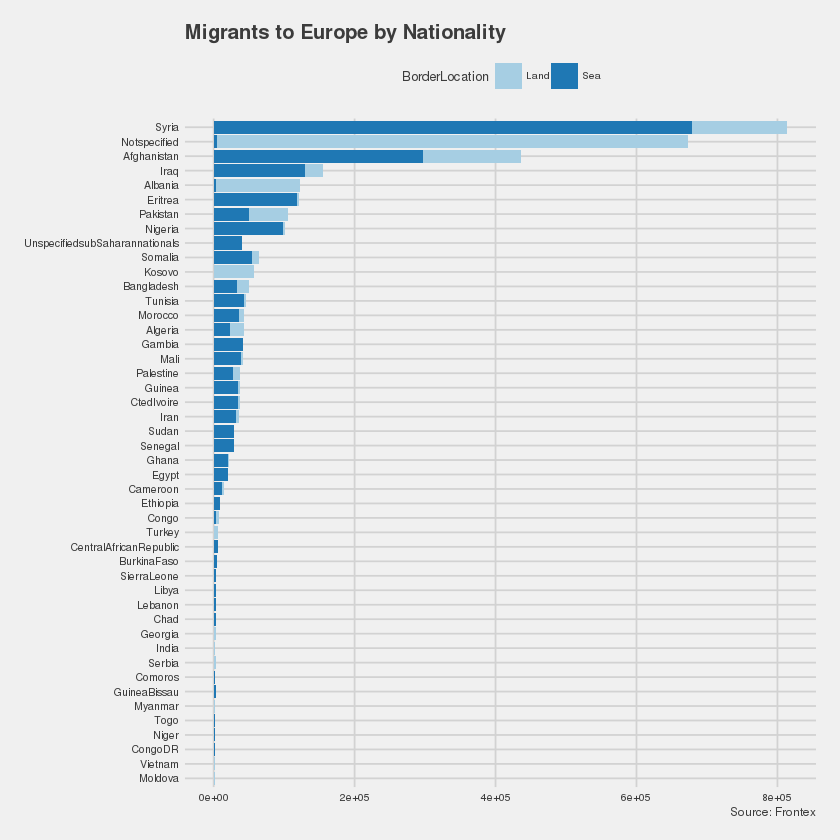

In [78]:
# plot migrants by Nationality 

# reorder for the plot 
flong_nat_sum <- transform(flong_nat_sum, NationalityLong = reorder(NationalityLong, Count))

# subset so we can view a reasonable number of records 
CM <- flong_nat_sum[flong_nat_sum$Count >= 1500,]

ggplot(data=CM, aes(x=NationalityLong, y=Count, fill=BorderLocation)) +
  geom_bar(stat="identity")+
  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Paired")+
  theme_fivethirtyeight(base_size = 8, base_family = "sans") + 
  coord_flip() +
  theme(legend.position='top', legend.text=element_text(size=6)) + 
  ggtitle("Migrants to Europe by Nationality") +
  labs(caption = "Source: Frontex") 


#### Takeaway 

* Syria, Afghanistan, and Iraq make up a large proportion of migrants coming to Europe.  This group of migrants also appear to prefer crossing into Europe by sea
* Nonspecified country of origin makes up a signifcant proportion of values in the data 
* Countries such as Albania and Kosovo which are in southeast Europe (Balkans) appear to prefer using a land crossing to Europe

In [79]:
border <- frontex

# change the route variable to a factor 
border$BorderLocation <- as.factor(border$BorderLocation)

# drop some columns 
border$Route <- NULL
border$NationalityLong <- NULL 

# group the data by route and sum by date column
border_sums <- border %>% 
  group_by(BorderLocation) %>% 
  summarise_all(funs(sum))

# view your new data frame with route totals by date
head(border_sums)

# now transform the data so dates are in one column 2 and values/counts are in column 3
border_lg <- border_sums %>% gather(Date, Count, 2:107)

border_lg$Date <- cleanup(border_lg$Date)

# view the new data to make sure it is in long form 
head(border_lg)

BorderLocation,Jan-09,Feb-09,Mar-09,Apr-09,May-09,Jun-09,Jul-09,Aug-09,Sep-09,⋯,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17
Land,3008,2988,3951,5479,6845,5005,5130,5115,7218,,2220,3056,2043,1888,1646,2200,1990,3202,3416,2656
Sea,3885,3751,5353,4710,3923,3910,4115,4120,4095,,7035,10666,13858,15076,26225,27998,16585,10330,13883,14092


BorderLocation,Date,Count
Land,2009-01-01,3008
Sea,2009-01-01,3885
Land,2009-02-01,2988
Sea,2009-02-01,3751
Land,2009-03-01,3951
Sea,2009-03-01,5353


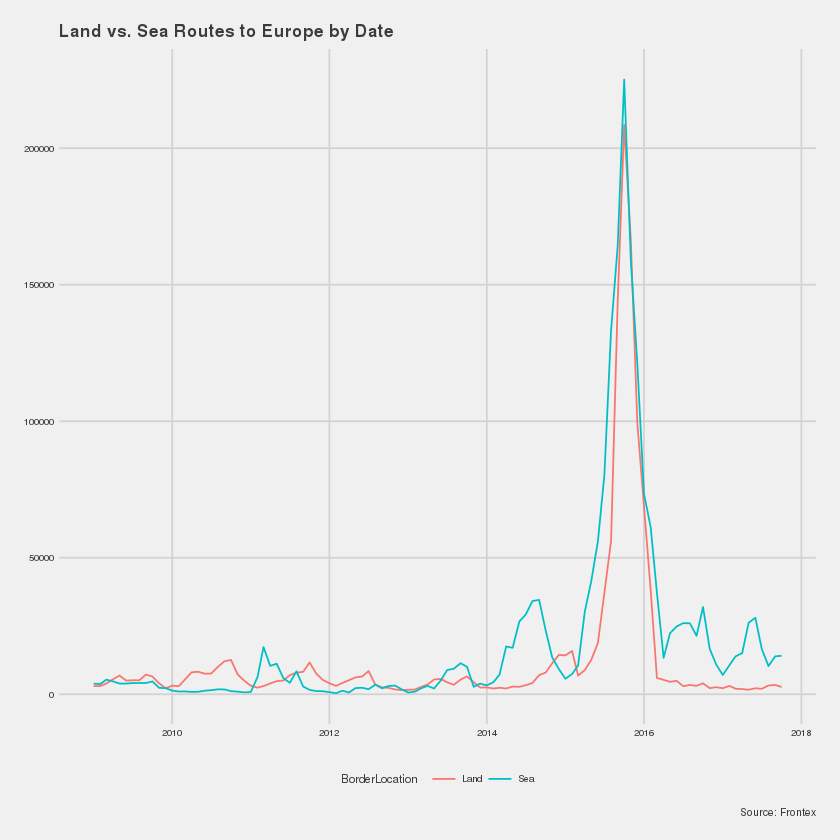

In [80]:
# plot the migrant land vs. Sea routes to europe by Date
p1 <- ggplot(border_lg, aes(x=Date, y=Count, colour = BorderLocation)) + 
  geom_line() +
  ylab("Number of Migrants") +
  theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
  ggtitle("Land vs. Sea Routes to Europe by Date") +
  labs(caption = "Source: Frontex") 

p1

#### Takeaways 

* In 2015 both the land and sea border crossings peaked simultaneously
* Since 2016 most migrants are coming to Europe by sea 


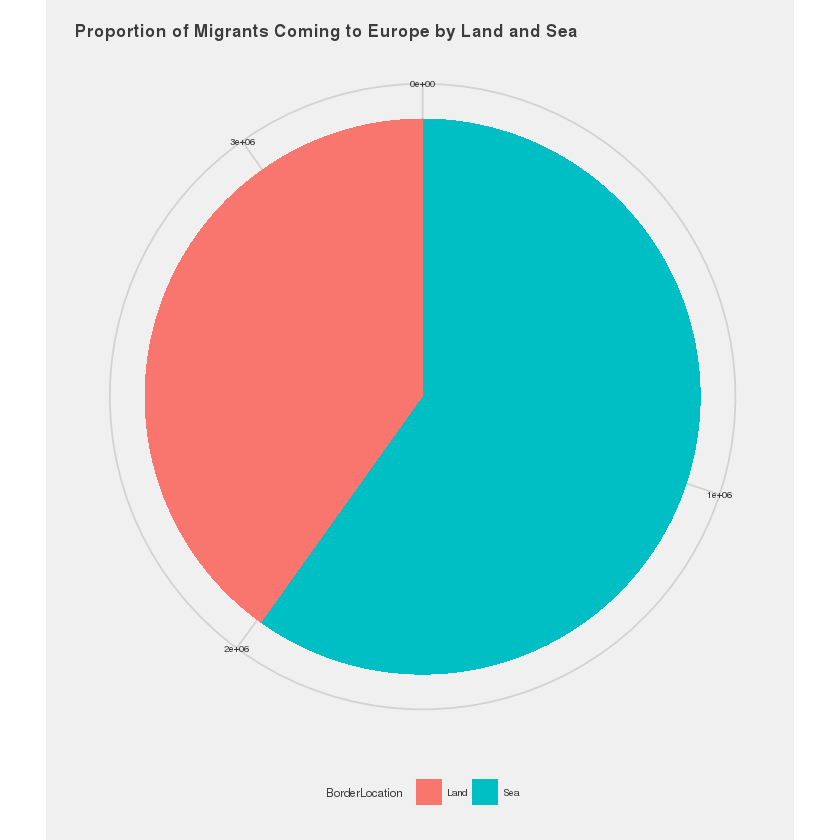

In [81]:
border_lg$Date <- NULL 

# group the data by route and sum by date column
bdr_df <- border_lg %>% 
  group_by(BorderLocation) %>% 
  summarise_all(funs(sum))


# plot missing persons in the med region 
pie <- ggplot(bdr_df, aes(x="", y=Count, fill=BorderLocation)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y", start=0) + 
    theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
    scale_color_brewer(name='',palette='Set1') + 
    ggtitle('Proportion of Migrants Coming to Europe by Land and Sea')
pie

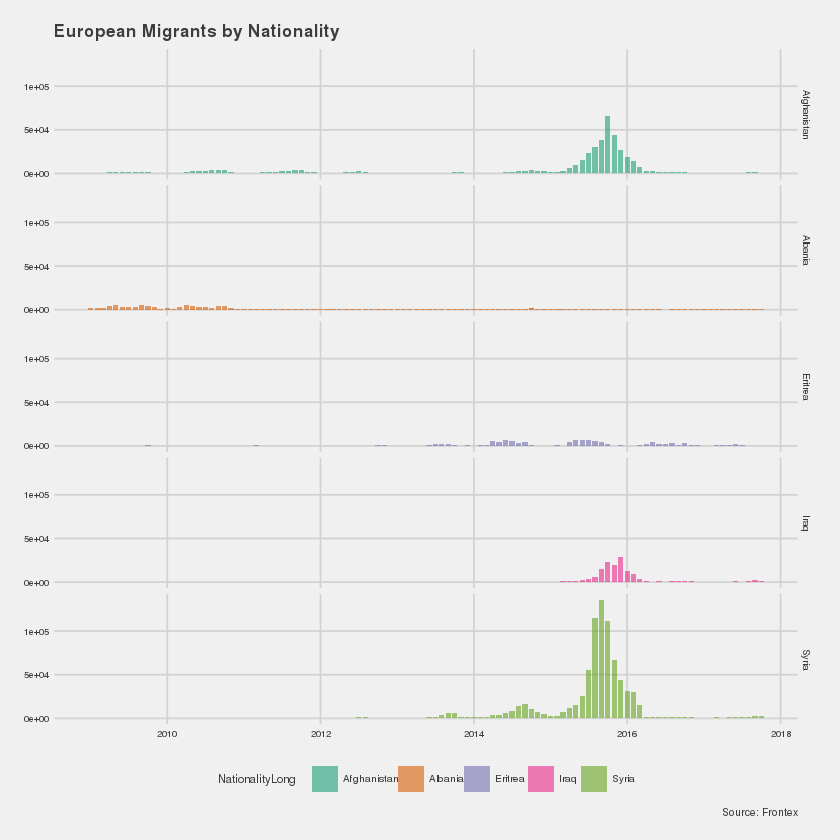

In [82]:
# group the data by Nat and sum by date column
nat_route <- flong %>% 
  group_by(NationalityLong, Route, Date) %>% 
  summarise(Count = sum(Count))

# apply our date function 
nat_route$Date <- cleanup(nat_route$Date)

# let's look at the top five countries where migrants come from 
nat_rte_p <- nat_route[nat_route$NationalityLong %in% c('Afghanistan', 'Syria', 'Iraq', 'Albania', 'Eritrea'), ]


p3 <- ggplot(data=nat_rte_p, aes(x=Date, y=Count, fill=NationalityLong)) +
  geom_bar(alpha = 6/10, stat="identity")+
  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Dark2")+
  theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
  theme(legend.position='bottom', legend.text=element_text(size=6)) + 
  ggtitle("European Migrants by Nationality") +
  labs(caption = "Source: Frontex") +
  facet_grid(NationalityLong ~ .)

p3

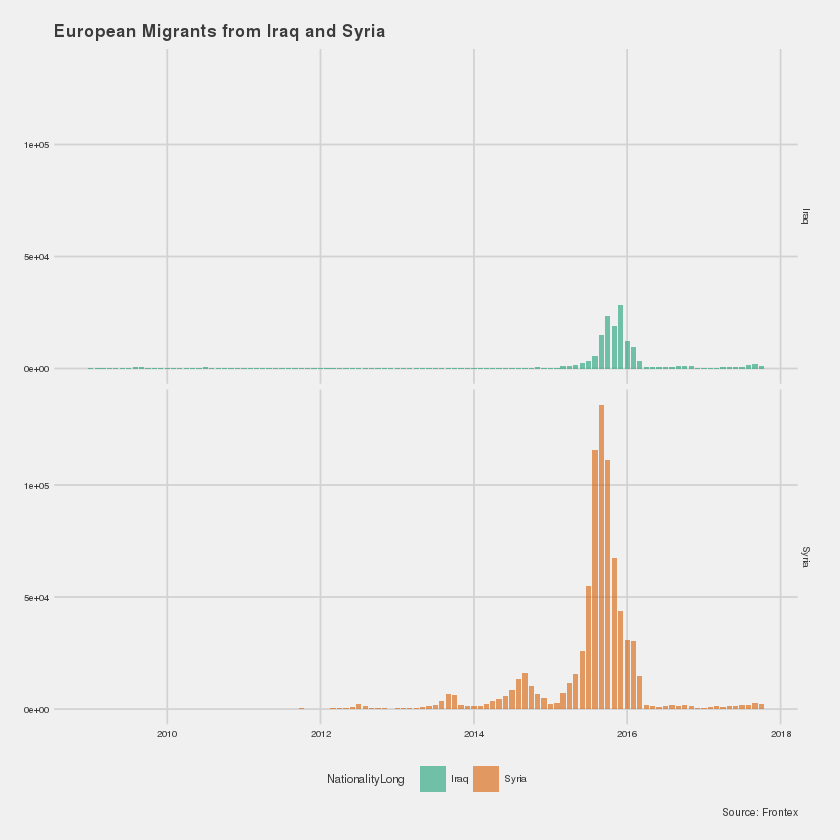

In [83]:
# let's focus on migrants coming from the middle east
natp <- nat_route[nat_route$NationalityLong %in% c('Syria', 'Iraq'), ]


p4 <- ggplot(data=natp, aes(x=Date, y=Count, fill=NationalityLong)) +
  geom_bar(alpha = 6/10, stat="identity")+
  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Dark2")+
  theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
  theme(legend.position='bottom', legend.text=element_text(size=6)) + 
  ggtitle("European Migrants from Iraq and Syria") +
  labs(caption = "Source: Frontex") +
  facet_grid(NationalityLong ~ .)

p4

#### Takeaways:  

* We notice several waves of migrants coming from Syria to Europe, peaking in 2015
* Migrants from Albania mostly came to Europe between 2009 and 2012
* Migrants from Iraq seemed to have peaked about the same time as Syrian migrants



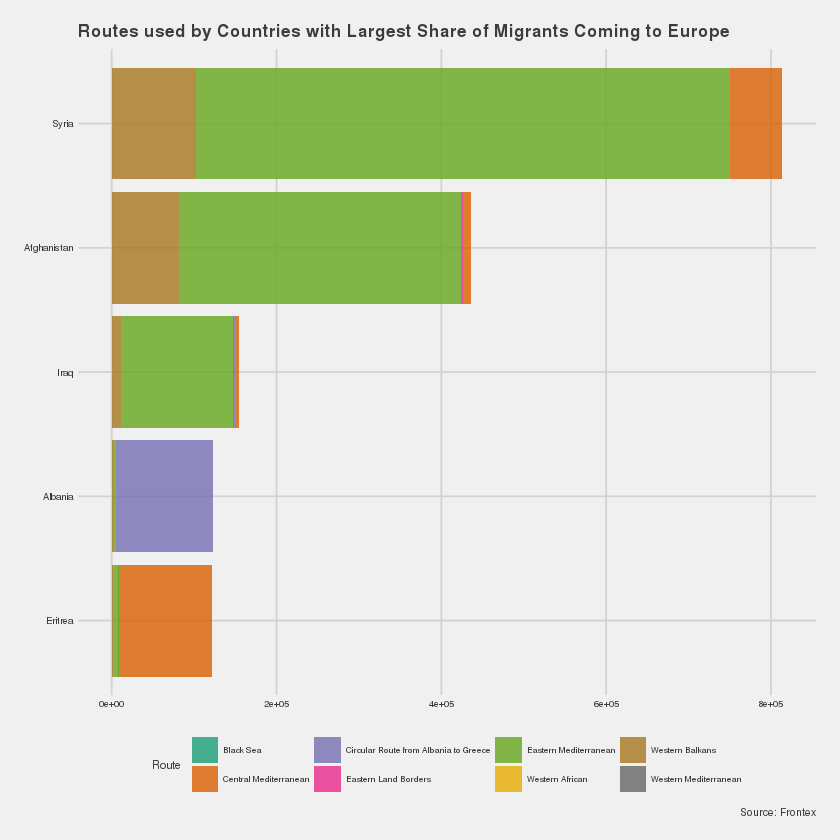

In [84]:
# get rid of values less than one
nat_rte_p <- nat_rte_p[nat_rte_p$Count >= 1,]

# reorder so our plot looks nice
nat_rte_p <- transform(nat_rte_p, NationalityLong = reorder(NationalityLong, Count))

# we're going to drop the Other route value for the plot  
# it doesn't show up in the plot and gives us some poor color choices
nat_rte_p <- nat_rte_p[!(nat_rte_p$Route %in% c('Other')), ]


p5 <- ggplot(data=nat_rte_p, aes(x=NationalityLong, y=Count, fill=Route)) +
  geom_bar(alpha = 8/10, stat="identity")+
#  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Dark2")+
  theme_fivethirtyeight(base_size = 7, base_family = "sans") + 
  theme(legend.position='bottom', legend.text=element_text(size=5)) + 
  coord_flip() +
  ggtitle("Routes used by Countries with Largest Share of Migrants Coming to Europe") +
  labs(caption = "Source: Frontex") 
#  facet_grid(Route ~ .)

p5 

#### Takeaways:  

* Migrants coming from the Middle East and Afghanistan are primarily using the Mediterranean Sea Route and the Western Balkan Route 
* Albania borders Greece so it is not surprising this route is being used by migrants from Albania
* Migrants from Eritrea are primarily using the Central Med route 



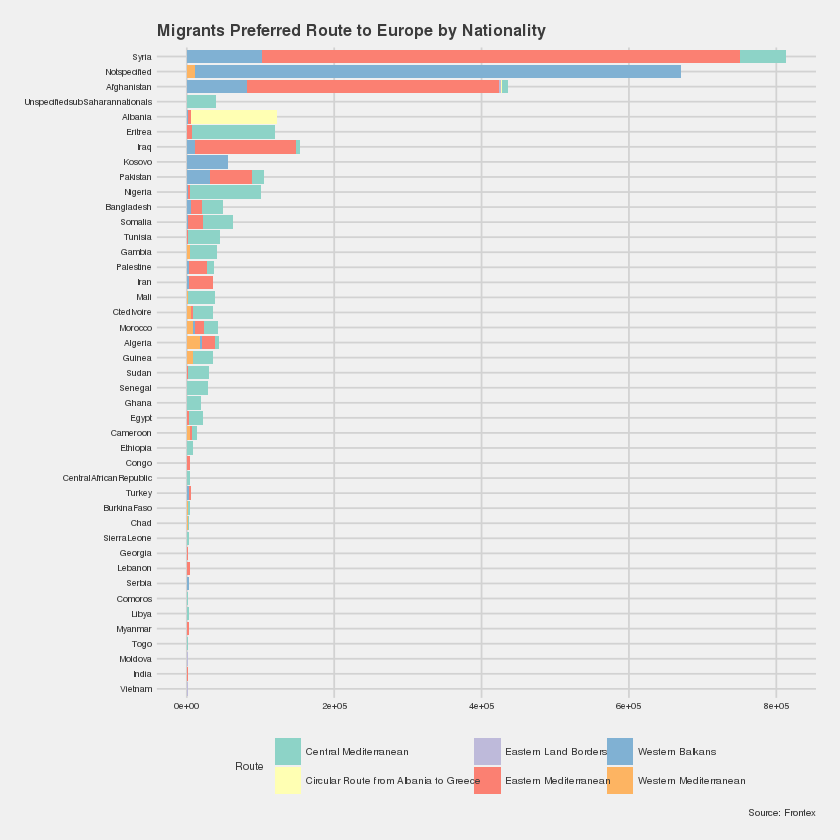

In [85]:
nat_rte <- frontex %>% 
        gather(Date, Count,4:109) 

# clean up the columns 
nat_rte$NationalityLong <- as.factor(nat_rte$NationalityLong)
nat_rte$Route <- as.factor(nat_rte$Route)
nat_rte$BorderLocation <- NULL 
nat_rte$Date <- NULL 


# group the data by Nat and sum by date column
rte_nat_sum <- nat_rte %>% 
  group_by(NationalityLong, Route) %>% 
  summarise(Count = sum(Count))

# plot migrants by Nationality 

# reorder for the plot 
rte_nat_sum <- transform(rte_nat_sum, NationalityLong = reorder(NationalityLong, Count))

# subset so we can view a reasonable number of records 
data <- rte_nat_sum[rte_nat_sum$Count >= 1500,]

ggplot(data=data, aes(x=NationalityLong, y=Count, fill=Route)) +
  geom_bar(stat="identity")+
  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Set3")+
  theme_fivethirtyeight(base_size = 6.5, base_family = "sans") + 
  coord_flip() +
  theme(legend.position='bottom', legend.text=element_text(size=6)) + 
  ggtitle("Migrants Preferred Route to Europe by Nationality") +
  labs(caption = "Source: Frontex") 

#### Takeaways:  

* Migrants originating from the Middle East and Afghanistan, Pakistan are primarily using the Eastern Mediterranean Sea Route and the Western Balkan Route to come to Europe
* Migrants originating from African countries are primarily using the Central Med Route 
* A small number of Syrians and Pakistani migrants are using the Central Med Route, which is not the most direct route. 


### Recommendations and Conclusions 

* The wave of migrants coming to Europe from the Middle East appears to be over
* Given the cyclical nature of migrants using the Central Med Route, we suggest allocating border patrol, coast guard, and humanitarian resoures aimed at this route in advance of the summer 2018.  
* Europe's most porus border areas include places along the Eastern and Central Mediterranean Sea and the Western Balkans. This is consistent with what we've been seeing in the news about migrants coming to Europe via Turkey.  
* The wave of migrants in 2015 was mostly from Syria, followed by Iraq and Afghanistan 